In [1]:
%matplotlib inline
from pycocotools.coco import COCO

import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import pylab
import random
import json
import csv
from shutil import copyfile
import os

pylab.rcParams['figure.figsize'] = (15.0, 20.0)

In [5]:
classes_yolo = {'0':'person', '1':'bicycle', '2':'car', '3':'motorcycle', '4':'bus', '5':'train', '6':'truck', '7':'fire hydrant', '8':'stop sign', '9':'cat', '10':'dog', '11':'traffic_light_red', '12':'traffic_light_green', '13':'traffic_light_na'}

In [6]:
def show_annotations(dataset_name, img_number):
    # Get all file names
    file_path = '../labels/' + dataset_name

    # Use this to iterate over all images
    image_names = os.listdir(file_path + dataset_ext)

    # Pick a filename
    image_name = (image_names[img_number].split('.')[0] + ".jpg").zfill(16)
    #image_name = (image_id + '.jpg').zfill(16)

    # Load annotation labels
    labels = []
    with open(file_path + dataset_ext + '/' + image_name.split('.')[0]+'.txt') as f:
        reader = csv.reader(f, delimiter=' ')
        for row in reader:
            labels.append(row)

    # Load image
    I = io.imread('%s/images/%s/%s'%('..',dataset_name,image_name.split('.')[0]+'.jpg'))
    fig, ax = plt.subplots()

    # Colours for boxes
    colours = {'12':'red', '13':'green', '14':'blue'}

    for label in labels:
        # Draw boxes
        name = classes_yolo[label[0]]
        # Transform coordinates so that boxes are plotted correctly
        w = float(label[3]) * I.shape[1]
        h = float(label[4]) * I.shape[0]
        x = (float(label[1]) - 0.5 * float(label[3])) * I.shape[1]
        y = (float(label[2]) - 0.5 * float(label[4])) * I.shape[0]

        if label[0] in ['12','13','14']:
            plt.text(x+1, y-5, name,fontdict={'fontsize':18.0, 'fontweight':'medium','color': 'white', 'backgroundcolor':colours[label[0]]})
            bb = patches.Rectangle((x, y), w, h, linewidth=2, edgecolor=colours[label[0]], facecolor='none')
            ax.add_patch(bb)
        else:
            plt.text(x+1, y-5, name,fontdict={'fontsize':18.0, 'fontweight':'medium','color': 'white', 'backgroundcolor':'gray'})
            bb = patches.Rectangle((x, y), w, h, linewidth=2, edgecolor='gray', facecolor='none')
            ax.add_patch(bb)
    
    ax.imshow(I)
    ax.axis('off')
    #plt.savefig('example.png')
    plt.show()

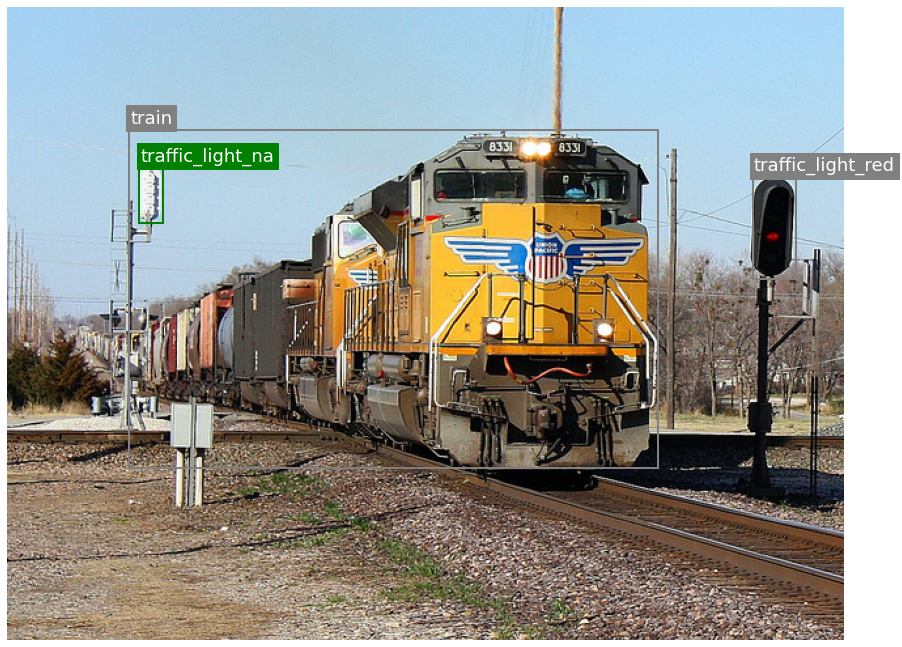

In [7]:
# Get filenames of all files in the folder
# 5, 
show_annotations('valTraffic', 10)